In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from micromet.outlier_removal import detect_extreme_variations, clean_extreme_variations, replace_flat_values


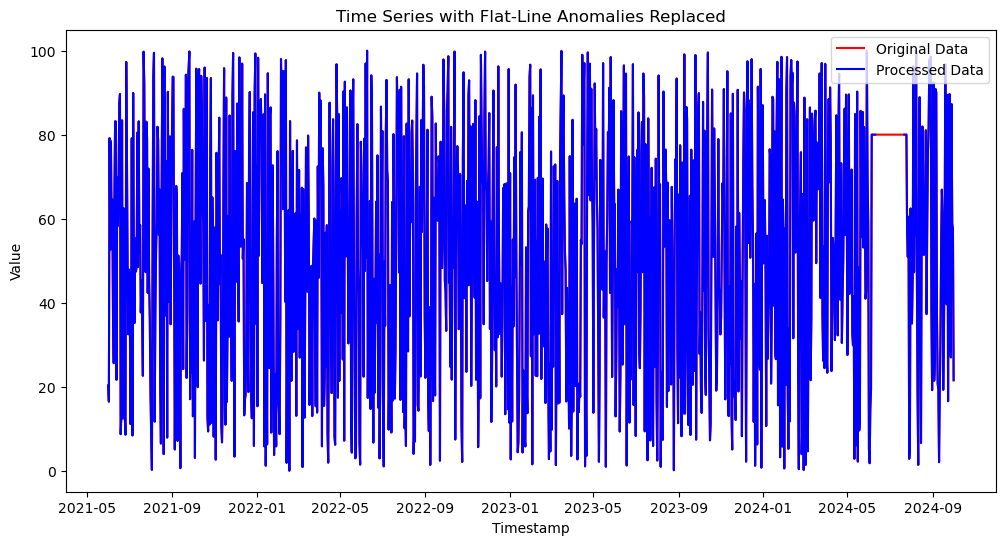

In [6]:


# Example Usage
# Create a synthetic dataset
data = pd.DataFrame({
    'timestamp': pd.date_range(start='2021-06-01', end='2024-10-01', freq='D'),
    'value': np.random.rand(1219) * 100  # Replace with your actual data
})

# Simulate a flat-line anomaly
data.loc[1100:1150, 'value'] = 80.0
data.set_index('timestamp', inplace=True)
# Call the function to process the data
processed_data = replace_flat_values(
    data,
    column_name='value',
    flat_threshold=0.01,
    window_size=10,
    replacement_value=np.nan  # Replace with -9999 if needed
)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['value'], label='Original Data', color='red')
plt.plot(processed_data.index, processed_data, label='Processed Data', color='blue')
plt.title('Time Series with Flat-Line Anomalies Replaced')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()


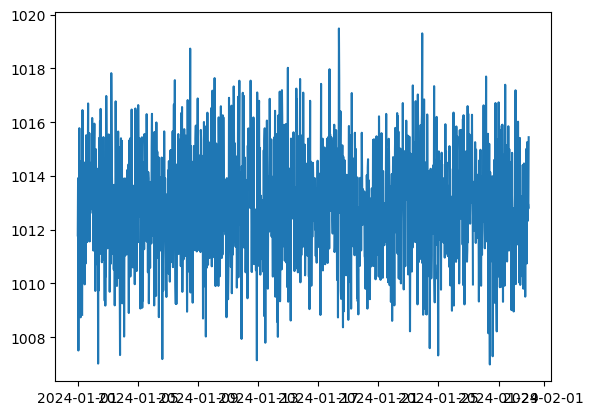

In [8]:
# Create sample data
dates = pd.date_range(start='2024-01-01', end='2024-01-31', freq='30min')
np.random.seed(42)

sample_data = pd.DataFrame({
    'temperature': np.random.normal(20, 5, len(dates)) + \
                   10 * np.sin(np.arange(len(dates)) * 2 * np.pi / 24),  # Daily cycle
    'humidity': np.random.normal(60, 10, len(dates)),
    'pressure': np.random.normal(1013, 2, len(dates))
}, index=dates)

# Add some extreme variations
sample_data.loc['2024-01-15', 'temperature'] = 45  # Extreme temperature
sample_data.loc['2024-01-20', 'humidity'] = -9999  # Null value

# Clean extreme variations
cleaning_results = clean_extreme_variations(
    df=sample_data,
    fields=['temperature', 'humidity', 'pressure'],
    frequency='D',
    variation_threshold=3.0,
    null_value=-9999,
    replacement_method='nan'
)


removed = cleaning_results.dropna(how='all')
plt.plot(cleaning_results.index, cleaning_results['pressure'], label='Temperature')

In [9]:
cleaning_results

,temperature,humidity,pressure
2024-01-01 00:00:00,22.483571,71.734739,1011.786270
2024-01-01 00:30:00,21.896869,61.810216,1013.915373
2024-01-01 01:00:00,28.238443,47.031681,1007.504990
2024-01-01 01:30:00,34.686217,63.996880,1012.000540
2024-01-01 02:00:00,27.489487,53.486431,1011.947504
...,...,...,...
2024-01-30 22:00:00,10.096290,53.322204,1013.308987
2024-01-30 22:30:00,20.965660,62.921927,1012.326895
2024-01-30 23:00:00,17.454875,58.126710,1012.960253
2024-01-30 23:30:00,21.086198,37.617688,1012.785470
